In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, HashingVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR, SVC
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV, LinearRegression, Ridge, ElasticNet
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
font2 = {'size': 20,'weight': 'normal'} # This code is so as to adjust the size of character among the axis
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("toxiccomments_sample_submission.csv")
features = data["id"]
label = data["prediction"]

In [2]:
has = HashingVectorizer()
features = has.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=0)

lasso = Lasso()       #Revoke the model Lasso
ridge = Ridge()


In [4]:
from sklearn.model_selection import GridSearchCV
parameters = {
             "alpha":[0.02,0.03,0.04, 2,3]
#              ,'min_impurity_decrease':[*np.linspace(0,0.5,50)]
             }
# GridSearchCV同时满足了 fit score 交叉验证三种功能
GS = GridSearchCV(lasso,parameters,cv=2)
GS = GS.fit(X_train,y_train)
# 从输入的参数和参数取值的列表中，返回最佳组合
print("Lass of GS.best_params_ = ", GS.best_params_)

Lass of GS.best_params_ =  {'alpha': 0.02}


In [5]:
parameters2 = {
             "alpha":[0.1,1,2,3]
#              ,'min_impurity_decrease':[*np.linspace(0,0.5,50)]
             }
GS = GridSearchCV(ridge,parameters2,cv=2)
GS = GS.fit(X_train,y_train)
# 从输入的参数和参数取值的列表中，返回最佳组合
print("ridge.best_params_ = ", GS.best_params_)

ridge.best_params_ =  {'alpha': 3}


In [3]:
from sklearn.tree import DecisionTreeRegressor
parameters3 = {
             "max_depth":[1,2,3,4,5]}
D_tree=DecisionTreeRegressor()
GS = GridSearchCV(D_tree,parameters3,cv=2)
GS = GS.fit(X_train,y_train)
print("D_tree.best_params_ = ", GS.best_params_)

D_tree.best_params_ =  {'max_depth': 2}


ridge regression model mean absolute error： 0.4995965243394849
ridge regression model mean squared error： 0.25089637609166926
ridge regression model median absolute error： 0.484923902998308
ridge regression model explained variance score： -0.00424528119850498
ridge regression model r2 score： -0.004260889707079052


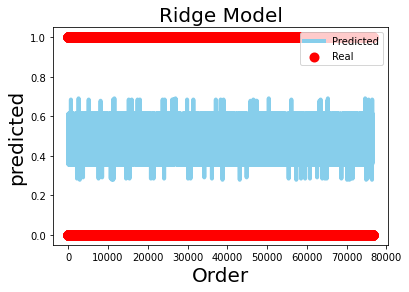

In [6]:
ridge = Ridge(alpha=3.0, fit_intercept=True, normalize=False,copy_X=True, max_iter=None, tol=1e-3, solver="auto",
                         random_state=None)
ridge.fit(X_train, y_train)             #Fit the train dataset
y_predict = ridge.predict(X_test)       #Predict the result by utilizing the Ridge model
print('ridge regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('ridge regression model mean squared error：',mean_squared_error(y_test,y_predict))
print('ridge regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('ridge regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('ridge regression model r2 score：',r2_score(y_test,y_predict))
plt.figure()
plt.scatter( range(len(y_test)), y_test, color = "red", label = "Real", linewidth = 4)          #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "skyblue", label = "Predicted", linewidth = 4)  #Plot the predicted data
plt.title("Ridge Model", fontdict=font2)
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()

Lasso regression model mean absolute error： 0.4996139614397029
Lasso regression model mean squared error ： 0.2498355545709912
Lasso regression model median absolute error： 0.48511399545585127
Lasso regression model explained variance score： -2.220446049250313e-16
Lasso regression model r2 score： -1.474800996947856e-05


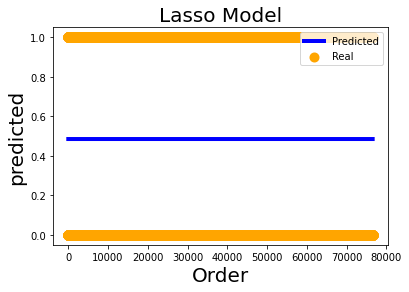

In [7]:
lasso = Lasso(alpha=0.02, normalize=True)       #Revoke the model Lasso
results_lasso = lasso.fit(X_train, y_train)     #Fit the train dataset
y_predict = lasso.predict(X_test)               #Predict the result by utilizing the Lasso model

print('Lasso regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('Lasso regression model mean squared error ：',mean_squared_error(y_test,y_predict))
print('Lasso regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('Lasso regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('Lasso regression model r2 score：',r2_score(y_test,y_predict))
plt.figure()        #Create a new figure
plt.scatter( range(len(y_test)), y_test, color = "orange", label = "Real", linewidth = 4)   #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "blue", label = "Predicted", linewidth = 4) #Plot the predicted data
plt.title("Lasso Model", fontdict=font2)    #Set the model title name
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()

D_tree regression model mean absolute error： 0.4996129152216717
D_tree regression model mean squared error ： 0.2498357110767579
D_tree regression model median absolute error： 0.4850736523192645
D_tree regression model explained variance score： -2.220446049250313e-16
D_tree regression model r2 score： -1.5374454332528487e-05




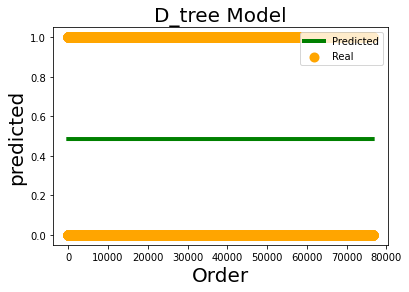

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=0)
D_tree=DecisionTreeRegressor(max_depth=2)
D_tree.fit(X_train,y_train)
y_predict = D_tree.predict(X_test) #Predict the result by utilizing the SVC model

print('D_tree regression model mean absolute error：',mean_absolute_error(y_test,y_predict))  #越小越好
print('D_tree regression model mean squared error ：',mean_squared_error(y_test,y_predict))   #越小越好
print('D_tree regression model median absolute error：',median_absolute_error(y_test,y_predict))  #越小越好
print('D_tree regression model explained variance score：',explained_variance_score(y_test,y_predict))    #越大越好
print('D_tree regression model r2 score：',r2_score(y_test,y_predict))     #越大越好                               #越大越好
print("\n")

plt.figure()        #Create a new figure
plt.scatter( range(len(y_test)), y_test, color = "orange", label = "Real", linewidth = 4)   #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "green", label = "Predicted", linewidth = 4) #Plot the predicted data
plt.title("D_tree Model", fontdict=font2)    #Set the model title name
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()